In [1]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
from collections import Counter

In [2]:
url = 'https://bestrestaurantsparis.com/fr/restaurant-paris/41-penthievre-restaurant-paris.html'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')
soup.title.string


'Restaurant Au 41 Penthièvre, Paris 8ème | bestrestaurantsparis.com'

In [3]:
dishes = soup.find_all('div', class_='restaurant-menu-item')
dishes

[<div class="restaurant-menu-item">
 <div class="restaurant-menu-price"><span> 16,00 €</span></div>
 <div class="restaurant-menu-desc">Velouté de potiron du Domaine des Bagots en Sologne éclats de châtaignes, et dès de foie gras</div>
 </div>,
 <div class="restaurant-menu-item">
 <div class="restaurant-menu-price"><span> 18,00 €</span></div>
 <div class="restaurant-menu-desc">Oeuf de poule cuit mollet roulé à la mie de pain girolles de Corrèze en persillade légère</div>
 </div>,
 <div class="restaurant-menu-item">
 <div class="restaurant-menu-price"><span> 19,00 €</span></div>
 <div class="restaurant-menu-desc">Darphin de pomme de terre, saumon fumé "Label Rouge" fleurette aux perles d'Avruga</div>
 </div>,
 <div class="restaurant-menu-item">
 <div class="restaurant-menu-price"><span> 25,00 €</span></div>
 <div class="restaurant-menu-desc">Gelée de tourteaux à l'infusion d'herbes bavaroise de crustacés au fenouil et caviar de harengs</div>
 </div>,
 <div class="restaurant-menu-item">
 

In [33]:
# Extract the dish names and prices
data = []
for dish in dishes:
    price = dish.find('div', class_='restaurant-menu-price').get_text(strip=True)
    description = dish.find('div', class_='restaurant-menu-desc').get_text(strip=True)
    data.append([price, description])

# Create a DataFrame
df = pd.DataFrame(data, columns=['Price', 'Description'])
df


,Price,Description
0,"16,00 €",Velouté de potiron du Domaine des Bagots en So...
1,"18,00 €",Oeuf de poule cuit mollet roulé à la mie de pa...
2,"19,00 €","Darphin de pomme de terre, saumon fumé ""Label ..."
3,"25,00 €",Gelée de tourteaux à l'infusion d'herbes bavar...
4,"19,00 €",Escalope de foie gras de canard poêlé du Sud-O...
5,"39,00 €",Ravioles de langoustines Bretonnes bisque à l'...
6,"41,00 €",Suprême de bar en croûte d'amandes ravigote au...
7,"37,00 €",Magret de canard du Sud-Ouest caramélisé aux d...
8,"49,00 €","Filet de boeuf de Salers cuit au poêlon, sauce..."
9,"46,00 €","Noix de ris de veau laqué au vin rouge, pois g..."


### Part 2: Meat database

In [ ]:
url_base = "https://www.marmiton.org/recettes/index/categorie/"
categories = ['viande', 'poisson', 'oeufs', 'fruits-de-mer', 'plat-vegetarien', 'plats-au-fromage']

# Create a dictionary to store recipe titles and links for each category
all_recipes_by_category = {}

# Iterate through categories
for category in categories:
    url_category = url_base + category + '/'
    
    # Create lists to store recipe titles and links for the current category
    recipe_titles = []
    recipe_links = []
    
    # Iterate through pages from 1 to 200
    for i in range(1, 6):
        url_page = url_category + str(i)
        response = requests.get(url_page)
        soup = BeautifulSoup(response.text, 'html.parser')

        # Find all anchor tags with the class 'recipe-card-link'
        recipe_cards = soup.find_all('a', class_='recipe-card-link')

        # Check if any recipe cards are found
        if recipe_cards:
            for card in recipe_cards:
                # Within each anchor tag, find the h4 element with the class 'recipe-card__title'
                title_element = card.find('h4', class_='recipe-card__title')
                
                # Find the link (href) of the recipe
                recipe_link = card['href']
                response1 = requests.get(recipe_link)
                recipe = BeautifulSoup(response1.text, 'html.parser')

                # Check if the title element is found before adding its text to the list
                if title_element:
                    recipe_titles.append(title_element.text.strip())
        else:
            # If no recipe cards are found, break out of the inner loop
            break

    # Add the lists of recipe titles and links to the dictionary with the category as the key
    all_recipes_by_category[category] = {'titles': recipe_titles, 'links': recipe_links}


# Print the dictionary containing recipe titles and links for each category
# print(all_recipes_by_category)

In [ ]:
#### Recipe + Ingredients

import requests
from bs4 import BeautifulSoup

url_base = "https://www.marmiton.org/recettes/index/categorie/"
categories = ['viande', 'poisson', 'oeufs', 'fruits-de-mer', 'plat-vegetarien', 'plats-au-fromage']
#categories = ['viande','plat-vegetarien']
# Create a dictionary to store recipe titles, links, and ingredient names for each category
all_recipes_by_category = {}

# Iterate through categories
for category in categories:
    url_category = url_base + category + '/'
    
    # Create lists to store recipe titles, links, and ingredient names for the current category
    recipe_titles = []
    #recipe_links = []
    ingredient_names_list = []  # New list to store ingredient names
    
    # Iterate through pages from 1 to 200
    for i in range(1, 6):
        url_page = url_category + str(i)
        response = requests.get(url_page)
        soup = BeautifulSoup(response.text, 'html.parser')

        # Find all anchor tags with the class 'recipe-card-link'
        recipe_cards = soup.find_all('a', class_='recipe-card-link')

        # Check if any recipe cards are found
        if recipe_cards:
            for card in recipe_cards:
                # Within each anchor tag, find the h4 element with the class 'recipe-card__title'
                title_element = card.find('h4', class_='recipe-card__title')
                
                # Find the link (href) of the recipe
                recipe_link = card['href']
                response1 = requests.get(recipe_link)
                recipe = BeautifulSoup(response1.text, 'html.parser')

                # Check if the title element is found before adding its text to the list
                if title_element:
                    recipe_titles.append(title_element.text.strip())
                    #recipe_links.append(recipe_link)
                    
                    # Extract ingredient names from card-ingredient elements
                    card_ingredient_elements = recipe.find_all('div', class_='card-ingredient')
                    ingredient_names = [element['data-name'] for element in card_ingredient_elements]
                    ingredient_names_list.append(ingredient_names)
        else:
            # If no recipe cards are found, break out of the inner loop
            break

    # Add the lists of recipe titles, links, and ingredient names to the dictionary with the category as the key
    all_recipes_by_category[category] = {'titles': recipe_titles, 
                                         #'links': recipe_links, 
                                         'ingredients': ingredient_names_list}


# Print the dictionary containing recipe titles, links, and ingredient names for each category
print(all_recipes_by_category)


In [ ]:
all_recipes_by_category['viande']['ingredients']

###Importer la base de données

In [5]:
import json

# Specify the path to your JSON file
json_file_path = 'plats.json'

# Read the JSON file
with open(json_file_path, 'r', encoding='utf-8') as json_file:
    all_recipes_by_category = json.load(json_file)

# Display the loaded data
all_recipes_by_category


# Create a new dictionary for titles only
all_recipe_titles_by_category = {}

# Extract titles for each category
for category, data in all_recipes_by_category.items():
    titles = data.get('titles', [])  # Get titles or an empty list if 'titles' key is not present
    all_recipe_titles_by_category[category] = titles

# Display the new dictionary
all_recipe_titles_by_category

{'viande': ['Blanquette de veau : recette traditionnelle',
  'Poulet au four simple et savoureux',
  'Boeuf bourguignon : la vraie recette',
  'Rôti de boeuf au four tout simple',
  'Filet mignon de porc à la moutarde',
  'Cuisses de poulet au four',
  'Rôti de porc tout simple',
  "Gigot d'agneau : la recette traditionnelle",
  'Paupiettes de veau',
  'Osso bucco de veau',
  'Falafel (croquettes de pois chiches)',
  'Poulet basquaise',
  'Rôti de veau au four',
  "Souris d'agneau au miel et thym",
  'Sauté de porc à la crème de moutarde',
  'La côte de bœuf au four facile et cuite à la perfection',
  'Poulet rôti et ses pommes de terre',
  "Rosbeef au four à l'ail",
  'Rôti de porc : recette savoureuse',
  "Filet mignon de porc rôti à la moutarde à l'ancienne",
  "Epaule d'agneau confite facile",
  'Lentilles corail au curry',
  'poulet au coco et curry',
  'Poulet curry et oignons facile',
  "Rouelle de porc à l'ancienne",
  'Joue de porc à la bière',
  'Colombo de poulet',
  'Joue d

## NB: Si besoin de chercher des categories

In [6]:
url = "https://www.marmiton.org/recettes/index/categorie/plat-principal/"
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Find the unordered list with the class 'mrtn-tags-list'
tag_list = soup.find('ul', class_='mrtn-tags-list')

# Extract all the category names from the list items
categories = [li.a.text for li in tag_list.find_all('li', class_='mrtn-tag')]

# Print the list of category names
print(categories)


['viande', 'poisson', 'fruits de mer', 'plat unique', 'œufs', 'plat végétarien', 'pâtes, riz, semoule', 'plats au fromage']


In [96]:
all_words = ' '.join(all_recipe_titles_by_category['viande'])
word_counts = Counter(all_words.split())
df=pd.DataFrame(list(word_counts.items()),columns=['Word','Occurence'])
rm=["de","le","la","les","et","au","aux","à","la",""]

df=(df.sort_values(by='Occurence',ascending=False)).reset_index(drop=True)
df[:100]

          Word  Occurence
0       poulet        739
1         porc        674
2       Poulet        530
3        sauce        431
4         veau        422
..         ...        ...
95       porto         42
96     Rognons         41
97   papillote         41
98  courgettes         41
99       bière         40

[100 rows x 2 columns]


In [97]:
def process_category(data, category_name):
    # Convert all words to lowercase
    data_lower = [word.lower() for word in data]

    # Flatten the list of strings into a single string
    all_words = ' '.join(data_lower)

    # Split the string into words and count occurrences
    word_counts = Counter(all_words.split())

    # Create a DataFrame from the Counter dictionary
    df = pd.DataFrame(list(word_counts.items()), columns=['Word', f'Occurrence_{category_name}'])

    # Remove specified words
    stop_words = ["de", "la", "et", "au", "aux", "à", "la", "en", "des"]
    df = df[~df['Word'].isin(stop_words)]

    # Sort the DataFrame by Occurrence in descending order
    df = df.sort_values(by=f'Occurrence_{category_name}', ascending=False)

    # Reinitialize the index
    df = df.reset_index(drop=True)

    return df

# Create and process DataFrames for each category
df_viande = process_category(all_recipe_titles_by_category['viande'], 'viande')
df_poisson = process_category(all_recipe_titles_by_category['poisson'], 'poisson')
df_vegetarien = process_category(all_recipe_titles_by_category['plat-vegetarien'], 'vegetarien')

# Find common words between the three DataFrames
common_words = set(df_viande['Word']) & set(df_poisson['Word']) & set(df_vegetarien['Word'])

# Remove common words from each DataFrame
df_viande = df_viande[~df_viande['Word'].isin(common_words)]
df_poisson = df_poisson[~df_poisson['Word'].isin(common_words)]
df_vegetarien = df_vegetarien[~df_vegetarien['Word'].isin(common_words)]

# Display the processed DataFrames
print("viande DataFrame:")
print(df_viande)

print("\npoisson DataFrame:")
print(df_poisson)

print("\nvegetarien DataFrame:")
print(df_vegetarien)

viande DataFrame:
                   Word  Occurrence_viande
1                  porc                710
2                  foie                521
4                  veau                440
6                  gras                417
9                mignon                318
...                 ...                ...
2915  endive-poire-foie                  1
2916           tiramisu                  1
2917    (chèvres-curry)                  1
2918       mini-légumes                  1
2919             tomaté                  1

[2742 rows x 2 columns]

poisson DataFrame:
           Word  Occurrence_poisson
1        filets                 166
3       poisson                 142
5     cabillaud                 108
12         pavé                  43
14        pavés                  41
..          ...                 ...
825   d'amandes                   1
826      croute                   1
827   d'épinard                   1
828  italiennes                   1
829        poil          

In [94]:
common_words

{'&',
 '(facile)',
 '-',
 '2',
 '3',
 ':',
 'a',
 'avec',
 'bacon',
 'banane',
 'basilic',
 'blanc',
 'blé',
 'brocolis',
 'burger',
 'béchamel',
 'carotte',
 'carottes',
 'champignons',
 'chef',
 'chorizo',
 'chou',
 'choux',
 'chèvre',
 'coco',
 'coeur',
 'colin',
 'companion',
 'comté',
 'concombres',
 'confit',
 'cookeo',
 'cooking',
 'courgettes',
 'courgettes,',
 'crème',
 'crémeux',
 'cuisine',
 'cuite',
 'cumin',
 'curry',
 'curry,',
 'céréales',
 "d'automne",
 "d'herbes",
 "d'été",
 'deux',
 'douce',
 'douces',
 'du',
 'et...',
 'facile',
 'farcie',
 'farcies',
 'farcis',
 'façon',
 'feta',
 'figues',
 'filet',
 'flamande',
 'fleur',
 'fondant',
 'forestière',
 'four',
 'frais',
 'fraîche',
 'fricassée',
 'fromage',
 'fruits',
 'fumée',
 'gingembre',
 'gnocchi',
 'gorgonzola',
 'graines',
 'gratin',
 'gratinés',
 'grillé',
 'haricots',
 'herbes',
 'jambon',
 'julienne',
 "l'ail",
 "l'huile",
 "l'italienne",
 'lait',
 'lard',
 'lardons',
 'laurent',
 'le',
 'lentilles',
 'les',

In [10]:
def process_category(data, category_name):
    # Convert all words to lowercase
    data_lower = [word.lower() for word in data]

    # Flatten the list of strings into a single string
    all_words = ' '.join(data_lower)

    # Split the string into words and count occurrences
    word_counts = Counter(all_words.split())

    # Create a DataFrame from the Counter dictionary
    df = pd.DataFrame(list(word_counts.items()), columns=['Word', f'Occurrence_{category_name}'])

    # Remove specified words
    stop_words = ["de", "la", "et", "au", "aux", "à", "la", "en", "des"]
    df = df[~df['Word'].isin(stop_words)]

    # Sort the DataFrame by Occurrence in descending order
    df = df.sort_values(by=f'Occurrence_{category_name}', ascending=False)

    # Reinitialize the index
    df = df.reset_index(drop=True)

    return df

# Create and process DataFrames for each category
df_viande = process_category(all_recipe_titles_by_category['viande'], 'viande')
df_poisson = process_category(all_recipe_titles_by_category['poisson'], 'poisson')
df_vegetarien = process_category(all_recipe_titles_by_category['plat-vegetarien'], 'vegetarien')

# Find common words between the three DataFrames
common_words = set(df_viande['Word']) & set(df_poisson['Word']) & set(df_vegetarien['Word'])

# Keep common words in the DataFrame with the highest occurrence
for word in common_words:
    occurrences_viande = df_viande.loc[df_viande['Word'] == word, f'Occurrence_viande'].values
    occurrences_poisson = df_poisson.loc[df_poisson['Word'] == word, f'Occurrence_poisson'].values
    occurrences_vegetarien = df_vegetarien.loc[df_vegetarien['Word'] == word, f'Occurrence_vegetarien'].values

    max_occurrence = max(occurrences_viande, occurrences_poisson, occurrences_vegetarien)

    if occurrences_viande and occurrences_viande[0] == max_occurrence:
        df_poisson = df_poisson[df_poisson['Word'] != word]
        df_vegetarien = df_vegetarien[df_vegetarien['Word'] != word]
    elif occurrences_poisson and occurrences_poisson[0] == max_occurrence:
        df_viande = df_viande[df_viande['Word'] != word]
        df_vegetarien = df_vegetarien[df_vegetarien['Word'] != word]
    elif occurrences_vegetarien and occurrences_vegetarien[0] == max_occurrence:
        df_viande = df_viande[df_viande['Word'] != word]
        df_poisson = df_poisson[df_poisson['Word'] != word]

# Display the processed DataFrames
print("viande DataFrame:")
print(df_viande)

print("\npoisson DataFrame:")
print(df_poisson)

print("\nvegetarien DataFrame:")
print(df_vegetarien)

viande DataFrame:
                   Word  Occurrence_viande
0                poulet               1275
1                  porc                710
2                  foie                521
3                 curry                464
4                  veau                440
...                 ...                ...
2915  endive-poire-foie                  1
2916           tiramisu                  1
2917    (chèvres-curry)                  1
2918       mini-légumes                  1
2919             tomaté                  1

[2901 rows x 2 columns]

poisson DataFrame:
           Word  Occurrence_poisson
0        saumon                 274
1        filets                 166
2     papillote                 155
3       poisson                 142
5     cabillaud                 108
..          ...                 ...
825   d'amandes                   1
826      croute                   1
827   d'épinard                   1
828  italiennes                   1
829        poil          

In [166]:
from collections import Counter
import pandas as pd
import string

def process_category(data, category_name):
    # Convert all words to lowercase and remove punctuation
    translator = str.maketrans("", "", string.punctuation)
    data_lower = [word.translate(translator).lower() for word in data]

    # Flatten the list of strings into a single string
    all_words = ' '.join(data_lower)

    # Split the string into words and count occurrences
    word_counts = Counter(all_words.split())

    # Create a DataFrame from the Counter dictionary
    df = pd.DataFrame(list(word_counts.items()), columns=['Word', f'Occurrence_{category_name}'])

    # Remove specified words
    stop_words = ["de", "la", "et", "au", "aux", "à", "la", "en", "des"]
    df = df[~df['Word'].isin(stop_words)]

    # Remove words that occur only three times
    df = df[df[f'Occurrence_{category_name}'] > 10]

    # Sort the DataFrame by Occurrence in descending order
    df = df.sort_values(by=f'Occurrence_{category_name}', ascending=False)

    # Reinitialize the index
    df = df.reset_index(drop=True)

    return df

# Create and process DataFrames for each category
df_viande = process_category(all_recipe_titles_by_category['viande'], 'viande')
df_poisson = process_category(all_recipe_titles_by_category['poisson'], 'poisson')
df_vegetarien = process_category(all_recipe_titles_by_category['plat-vegetarien'], 'vegetarien')
df_fruits_de_mer=process_category(all_recipe_titles_by_category['fruits-de-mer'],'fruits_de_mer')
# Find common words between the three DataFrames
common_words = (set(df_viande['Word']) & set(df_poisson['Word'])) | \
               (set(df_viande['Word']) & set(df_vegetarien['Word'])) | \
               (set(df_viande['Word']) & set(df_fruits_de_mer['Word'])) | \
               (set(df_poisson['Word']) & set(df_vegetarien['Word'])) | \
               (set(df_poisson['Word']) & set(df_fruits_de_mer['Word'])) | \
               (set(df_vegetarien['Word']) & set(df_fruits_de_mer['Word']))


# Keep common words in the DataFrame with the highest occurrence
for word in common_words:
    occurrences_viande = df_viande.loc[df_viande['Word'] == word, f'Occurrence_viande'].values
    occurrences_poisson = df_poisson.loc[df_poisson['Word'] == word, f'Occurrence_poisson'].values
    occurrences_vegetarien = df_vegetarien.loc[df_vegetarien['Word'] == word, f'Occurrence_vegetarien'].values
    occurrences_fruits_de_mer = df_fruits_de_mer.loc[df_fruits_de_mer['Word'] == word, f'Occurrence_fruits_de_mer'].values
    max_occurrence = max(occurrences_viande, occurrences_poisson, occurrences_vegetarien,occurrences_fruits_de_mer)

    if occurrences_viande and occurrences_viande[0] == max_occurrence:
        df_poisson = df_poisson[df_poisson['Word'] != word]
        df_vegetarien = df_vegetarien[df_vegetarien['Word'] != word]
        df_fruits_de_mer = df_fruits_de_mer[df_fruits_de_mer['Word'] != word]
    elif occurrences_poisson and occurrences_poisson[0] == max_occurrence:
        df_viande = df_viande[df_viande['Word'] != word]
        df_vegetarien = df_vegetarien[df_vegetarien['Word'] != word]
        df_fruits_de_mer = df_fruits_de_mer[df_fruits_de_mer['Word'] != word]
    elif occurrences_vegetarien and occurrences_vegetarien[0] == max_occurrence:
        df_viande = df_viande[df_viande['Word'] != word]
        df_poisson = df_poisson[df_poisson['Word'] != word]
        df_fruits_de_mer = df_fruits_de_mer[df_fruits_de_mer['Word'] != word]
    elif occurrences_fruits_de_mer and occurrences_fruits_de_mer[0] == max_occurrence:
        df_viande = df_viande[df_viande['Word'] != word]
        df_poisson = df_poisson[df_poisson['Word'] != word]
        df_vegetarien = df_vegetarien[df_vegetarien['Word'] != word]

# Display the processed DataFrames
print("viande DataFrame:")
print(df_viande)

print("\npoisson DataFrame:")
print(df_poisson)

print("\nvegetarien DataFrame:")
print(df_vegetarien)

print("\nfruits de mer DataFrame:")
print(df_fruits_de_mer)

/tmp/ipykernel_2578/3622897819.py:54: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  max_occurrence = max(occurrences_viande, occurrences_poisson, occurrences_vegetarien,occurrences_fruits_de_mer)
/tmp/ipykernel_2578/3622897819.py:60: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  elif occurrences_poisson and occurrences_poisson[0] == max_occurrence:
/tmp/ipykernel_2578/3622897819.py:64: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  elif occurrences_vegetarien and occurrences_vegetarien[0] == max_occurrence:
/tmp/ipykernel_2578/3622897819.py:56: DeprecationWarning: T

viande DataFrame:
         Word  Occurrence_viande
0      poulet               1306
1        porc                718
2        foie                525
3       curry                483
4        veau                444
..        ...                ...
324    agneau                 11
326         3                 11
327  compotée                 11
328  dautomne                 11
329   flambés                 11

[299 rows x 2 columns]

poisson DataFrame:
             Word  Occurrence_poisson
0          saumon                 279
1          filets                 166
2       papillote                 158
3         poisson                 146
5       cabillaud                 111
6      papillotes                  95
7          gratin                  81
12           pavé                  43
14          pavés                  41
15            dos                  39
16           thon                  38
17          colin                  38
18          lotte                  36
20        

In [167]:
df_fruits_de_mer

,Word,Occurrence_fruits_de_mer
0,crevettes,812
1,saintjacques,288
2,moules,257
3,crabe,219
4,jacques,173
...,...,...
148,persil,11
149,petites,11
150,crabes,11
151,davocat,11


In [14]:
!pip install WordCloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.1/511.1 kB 10.4 MB/s eta 0:00:0000:01

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python -m pip install --upgrade pip


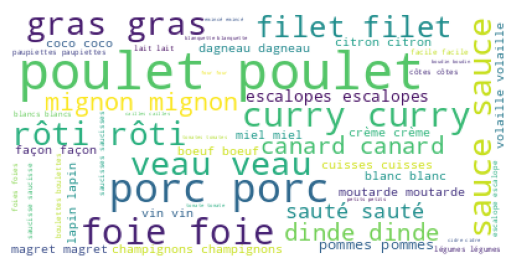

In [101]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
# Create a list of repeated words based on occurrences
word_list = [word for word, occurrence in zip(df_viande['Word'], df_viande['Occurrence_viande']) for _ in range(occurrence)]

# Join the list to create a string
result_string = ' '.join(word_list)




wordcloud = WordCloud(background_color = 'white', max_words = 50,repeat=False).generate(result_string)
plt.imshow(wordcloud)
plt.axis("off")
plt.show();

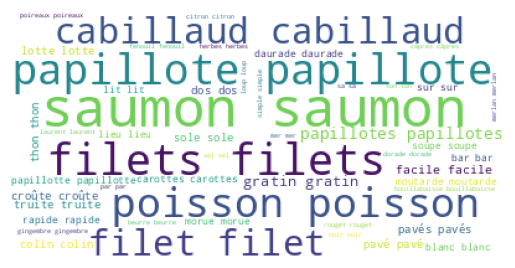

In [102]:
# Create a list of repeated words based on occurrences
word_list = [word for word, occurrence in zip(df_poisson['Word'], df_poisson['Occurrence_poisson']) for _ in range(occurrence)]

# Join the list to create a string
result_string = ' '.join(word_list)




wordcloud = WordCloud(background_color = 'white', max_words = 50).generate(result_string)
plt.imshow(wordcloud)
plt.axis("off")
plt.show();

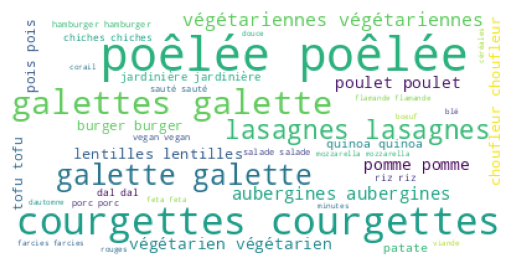

In [103]:
# Create a list of repeated words based on occurrences
word_list = [word for word, occurrence in zip(df_vegetarien['Word'], df_vegetarien['Occurrence_vegetarien']) for _ in range(occurrence)]

# Join the list to create a string
result_string = ' '.join(word_list)




wordcloud = WordCloud(background_color = 'white', max_words = 50).generate(result_string)
plt.imshow(wordcloud)
plt.axis("off")
plt.show();

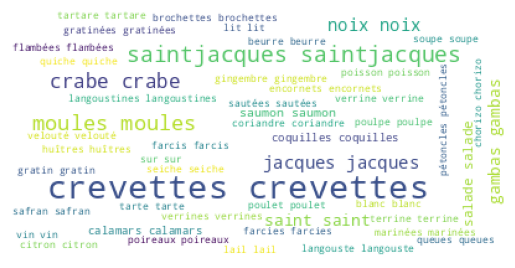

In [104]:
# Create a list of repeated words based on occurrences
word_list = [word for word, occurrence in zip(df_fruits_de_mer['Word'], df_fruits_de_mer['Occurrence_fruits_de_mer']) for _ in range(occurrence)]

# Join the list to create a string
result_string = ' '.join(word_list)




wordcloud = WordCloud(background_color = 'white', max_words = 50).generate(result_string)
plt.imshow(wordcloud)
plt.axis("off")
plt.show();

## Application avec restaurants

In [106]:
test=df.iloc[0, 1]
test

739

In [107]:
# Assuming df_viande is your DataFrame
# Replace 'Word' with your actual column name

# Extract unique words from the 'Word' column
unique_words = set(df_viande['Word'])

# Input sentence
test = "Velouté de potiron du Domaine des Bagots en Sologne éclats de châtaignes, et dès de foie gras"

# Split the sentence into words
words_in_test = test.split()

# Check if any words from the sentence are present in the DataFrame
matching_words = [word for word in words_in_test if word in unique_words]

# Display the matching words
print("Matching words in test:", matching_words)

Matching words in test: ['potiron', 'du', 'foie', 'gras']


In [108]:
# Extract unique words from the 'Word' column in df_viande
unique_words = set(df_viande['Word'])

# Create a list to store rows with no matching words
rows_with_no_match = []

# Iterate over each sentence in the DataFrame
for index, sentence in enumerate(df.iloc[:, 1]):
    # Split the sentence into words
    words_in_sentence = sentence.split()

    # Check if any words from the sentence are present in the DataFrame
    matching_words = [word for word in words_in_sentence if word in unique_words]

    # If no matching words, add the index to the list
    if not matching_words:
        rows_with_no_match.append(index)

# Display the rows with no matching words
print("Rows with no matching words:", rows_with_no_match)

AttributeError: 'int' object has no attribute 'split'

## Now we extract all restaurants as done above


In [109]:
url = 'https://bestrestaurantsparis.com/fr/restaurants.html'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')
soup.title.string

'Les meilleurs restaurants Paris, classés de «A à Z»'

In [110]:
# Find all div elements with class 'block-option-restaurant-name'
restaurant_name_divs = soup.find_all('div', class_='block-option-restaurant-name')

# Extract href from a elements within each div
for div in restaurant_name_divs:
    a_element = div.find('a')
    if a_element:
        href = a_element.get('href')
        print(href)

https://bestrestaurantsparis.com/fr/restaurant-paris/restaurant-le-122-paris.html
https://bestrestaurantsparis.com/fr/restaurant-paris/le404.html
https://bestrestaurantsparis.com/fr/restaurant-paris/restaurant-le-41-pasteur-paris.html
https://bestrestaurantsparis.com/fr/restaurant-paris/41-penthievre-restaurant-paris.html
https://bestrestaurantsparis.com/fr/restaurant-paris/6-new-york.html
https://bestrestaurantsparis.com/fr/restaurant-paris/restaurant-african-lounge-paris.html
https://bestrestaurantsparis.com/fr/restaurant-paris/agape.html
https://bestrestaurantsparis.com/fr/restaurant-paris/restaurant-un-air-de-famille-paris.html
https://bestrestaurantsparis.com/fr/restaurant-paris/al-dente.html
https://bestrestaurantsparis.com/fr/restaurant-paris/alleno-paris-pavillon-ledoyen-restaurant-paris.html
https://bestrestaurantsparis.com/fr/restaurant-paris/laltro.html
https://bestrestaurantsparis.com/fr/restaurant-paris/restaurant-ambassade-d-auvergne-paris.html
https://bestrestaurantspari

In [111]:

# Find all div elements with class 'block-option-restaurant-name'
restaurant_name_divs = soup.find_all('div', class_='block-option-restaurant-name')

# Extract href from a elements within each div and save in a list
restaurant_links = [div.find('a').get('href') for div in restaurant_name_divs]

# Display the list of restaurant links
print(restaurant_links)


['https://bestrestaurantsparis.com/fr/restaurant-paris/restaurant-le-122-paris.html', 'https://bestrestaurantsparis.com/fr/restaurant-paris/le404.html', 'https://bestrestaurantsparis.com/fr/restaurant-paris/restaurant-le-41-pasteur-paris.html', 'https://bestrestaurantsparis.com/fr/restaurant-paris/41-penthievre-restaurant-paris.html', 'https://bestrestaurantsparis.com/fr/restaurant-paris/6-new-york.html', 'https://bestrestaurantsparis.com/fr/restaurant-paris/restaurant-african-lounge-paris.html', 'https://bestrestaurantsparis.com/fr/restaurant-paris/agape.html', 'https://bestrestaurantsparis.com/fr/restaurant-paris/restaurant-un-air-de-famille-paris.html', 'https://bestrestaurantsparis.com/fr/restaurant-paris/al-dente.html', 'https://bestrestaurantsparis.com/fr/restaurant-paris/alleno-paris-pavillon-ledoyen-restaurant-paris.html', 'https://bestrestaurantsparis.com/fr/restaurant-paris/laltro.html', 'https://bestrestaurantsparis.com/fr/restaurant-paris/restaurant-ambassade-d-auvergne-par

In [112]:
url = restaurant_links[68]
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')
soup.title.string
dishes = soup.find_all('div', class_='restaurant-menu-item')
data = []
for dish in dishes:
    price = dish.find('div', class_='restaurant-menu-price').get_text(strip=True)
    description = dish.find('div', class_='restaurant-menu-desc').get_text(strip=True)
    data.append([price, description])

# Create a DataFrame
df = pd.DataFrame(data, columns=['Price', 'Description'])
df

,Price,Description
0,"12,00 €",Gyoza
1,"22,00 €",Entrée du jour
2,"10,00 €",Salade de saison Sauce sésame
3,"10,00 €",Salade d'algues
4,"22,00 €",Tempura
5,"42,00 €",Coquille St. Jacques
6,"38,00 €",Canard
7,"95,00 €",Wagyu Kagoshima A5 entrecôte
8,"14,00 €",Sushis Œufs de Saumon Ikura
9,"20,00 €",Sashimis Negitoto


In [113]:

# Initialize an empty list to store DataFrames
all_dfs = []

for i in range(1, len(restaurant_links) - 1):
    print(i)
    url = restaurant_links[i]
    
    try:
        response = requests.get(url)
        response.raise_for_status()  # Check if the request was successful
        
        soup = BeautifulSoup(response.text, 'html.parser')
        restaurant_title = soup.title.string

        dishes = soup.find_all('div', class_='restaurant-menu-item')
        data = []

        for dish in dishes:
            price = dish.find('div', class_='restaurant-menu-price').get_text(strip=True)
            description = dish.find('div', class_='restaurant-menu-desc').get_text(strip=True)
            data.append([price, description])

        # Create a DataFrame for each restaurant
        df = pd.DataFrame(data, columns=['Price', 'Description'])

        # Store the DataFrame in the list
        all_dfs.append((restaurant_title, df))
        
    except Exception as e:
        print(f"Error processing {url}: {e}")
        continue  # Continue to the next iteration if an error occurs




1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
Error processing https://bestrestaurantsparis.com/fr/restaurant-paris/lapizzetta.html: 404 Client Error: Not Found for url: https://bestrestaurantsparis.com/fr/restaurant-paris/lapizzetta.html
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229

In [168]:
all_dfs[1][1].iloc[0,1].lower()

for j in range(len(all_dfs)):
    for i in range(len(all_dfs[j][1])):
        all_dfs[j][1].iloc[i,1]=all_dfs[j][1].iloc[i,1].lower()

In [170]:

def no_meat(sentance):
 # Extract unique words from the 'Word' column in df_viande
 unique_words = set(df_viande['Word'])

 # Create a list to store rows with no matching words
 rows_with_no_match = []

 # Iterate over each sentence in the DataFrame
 for index, sentence in enumerate(sentance):
     # Split the sentence into words
     words_in_sentence = sentence.split()

     # Check if any words from the sentence are present in the DataFrame
     matching_words = [word for word in words_in_sentence if word in unique_words]

     # If no matching words, add the index to the list
     if not matching_words:
        rows_with_no_match.append(index)

 # Display the rows with no matching words
 print("Rows with no matching words:", rows_with_no_match)

In [171]:
"saumon" in df_viande["Word"].values

False

In [172]:
import pandas as pd

def find_matching_words(test_string, main_dataframe):
    """
    Find words from the test string that are present in the 'Word' column of the main DataFrame.

    Parameters:
    - test_string: The test string to check for matching words.
    - main_dataframe: The main DataFrame containing the 'Word' column.

    Returns:
    - List of matching words.
    """
    # Extract unique words from the 'Word' column
    unique_words = set(main_dataframe['Word'])

    # Split the test string into words
    words_in_test = test_string.split()

    # Check if any words from the test string are present in the unique_words set
    matching_words = [word for word in words_in_test if word in unique_words]

    return matching_words

# Example usage:
# Replace 'TestString' and 'MainDataFrame' with your actual values
test_string_to_check = "Velouté de potiron du Domaine des Bagots en Sologne éclats de châtaignes, et dès de foie gras"


# Find matching words
result = find_matching_words(test_string_to_check, df_viande)
print("Matching words in test:", result)


Matching words in test: ['du', 'foie', 'gras']


In [173]:
for i in range(len(all_dfs[1][1])):
    print(find_matching_words(all_dfs[1][1].iloc[i,1],df_viande))

['agrumes']
['foie', 'gras', 'canard', 'fruits']
['basilic']
[]
[]
['epaule', 'sauge', 'chèvre', 'jus', 'romarin']
['filet', 'patates', 'sauce', 'épices', 'doux']
['sauce', 'curry', 'coco']
['filet', 'chou', 'jus', 'balsamique']
['légumes']
['rhum', 'sa']
['citron']
['amandes']
['fruits', 'rouges']
['caramel', 'salé']
[]


In [174]:
for j in range(len(all_dfs)):
    for i in range(len(all_dfs[j][1])):
     if find_matching_words(all_dfs[j][1].iloc[i,1],df_viande) == []:
        print(all_dfs[j][1].iloc[i,1])
     

pastilla traditionnelle au pigeon
salade méchouia ( poivrons, tomates, ail )
tagine de poisson
prix moyen à la carte
brunch ( samedi et dimanche )
escargots de bourgogne bordelaise
couteaux persillade
prix moyen à la carte
ravioles de langoustines bretonnes bisque à l'armoricaine et estragon
croustillant au chocolat guanaja, quenelle glacée
fromages affinés de nos régions
prix moyen à la carte
dos de cabillaud doré aux aromates
poulpe à la plancha
gourmandise chocolat
l'ananas en fraîcheur
cheese-cake
prix moyen à la carte
tartare d'espadon
avocat crevette
déclinaison de fritures en tapas
croquant trois chocolats
café gourmand
framboisier
prix moyen à la carte
tagliatelle de seiche
comté de garde d’exception de bernard antony
chocolat grand cru itakuja et macaé , ivoire
mille-feuille à la vanille de l’île de taha’a, truffe tuber aestivum
fraises gariguette, cléry
prix moyen à la carte
menu carte blancheexcursion gourmande autour de nos spécialités en petites portions-> « expression » :

## Application avec base de donnée elle même sans ingrédients (leakage)

Nous avons déjà les catégories qu'il faut

In [192]:
recipes = pd.read_csv("plats_csv_2.csv", sep=';', encoding='utf-8')
recipes['Title'] = recipes['Title'].str.lower()
recipes['viande'] = np.where(recipes['Category'] == 'viande', 1, 0)
recipes['pescaterien'] = np.where((recipes['Category'] == 'poisson') | (recipes['Category'] == 'fruits-de-mer'), 1, 0)
recipes

,Category,Title,Ingredients,viande,pescaterien
0,viande,blanquette de veau : recette traditionnelle,"poivre, sel, farine, crème fraîche, oignon jau...",1,0
1,viande,poulet au four simple et savoureux,"poivre, sel, feuille de laurier, tomates ceris...",1,0
2,viande,boeuf bourguignon : la vraie recette,"poivre, sel, beurre, vin rouge, carotte, oigno...",1,0
3,viande,rôti de boeuf au four tout simple,"thym, sel, poivre, huile d'olive, rôti de boeu...",1,0
4,viande,filet mignon de porc à la moutarde,"beurre, huile d'olive, moutarde, crème fraîche...",1,0
...,...,...,...,...,...
10428,plats-au-fromage,tartiflette des alpes,"Pomme de terre vapeur-rissolées U Bio, rebloch...",0,0
10429,plats-au-fromage,"tartine du soleil alpin (raclette, poivrons, t...","huile d'olive, courgette, tomate, poivron jaun...",0,0
10430,plats-au-fromage,tartines fromagères à la raclette,"sel, poivre, huile d'olive, baguette, fromage ...",0,0
10431,plats-au-fromage,tourte façon tartiflette,"sel, poivre, lard fumé, oignon, reblochon, pât...",0,0


In [200]:
find_matching_words(recipes["Title"][0],df_viande)


['blanquette', 'veau', 'recette']

In [206]:
for j in range(len(recipes)):
    matching_words = find_matching_words(recipes["Title"][j], df_viande)
    recipes.at[j, "viande_pred"] = 1 if matching_words else 0


In [214]:
# Assuming 'recipes' is your DataFrame
# Create a new DataFrame to store the confusion matrix
confusion_matrix = pd.DataFrame(index=['Actual Positive', 'Actual Negative'], columns=['Predicted Positive', 'Predicted Negative'], dtype=int)

# True Positives (TP)
confusion_matrix.at['Actual Positive', 'Predicted Positive'] = ((recipes['viande'] == 1) & (recipes['viande_pred'] == 1)).sum()

# False Positives (FP)
confusion_matrix.at['Actual Positive', 'Predicted Negative'] = ((recipes['viande'] == 1) & (recipes['viande_pred'] == 0)).sum()

# True Negatives (TN)
confusion_matrix.at['Actual Negative', 'Predicted Negative'] = ((recipes['viande'] == 0) & (recipes['viande_pred'] == 0)).sum()

# False Negatives (FN)
confusion_matrix.at['Actual Negative', 'Predicted Positive'] = ((recipes['viande'] == 0) & (recipes['viande_pred'] == 1)).sum()

# Display the confusion matrix
print(confusion_matrix)





                 Predicted Positive  Predicted Negative
Actual Positive              5831.0                77.0
Actual Negative              2899.0              1626.0


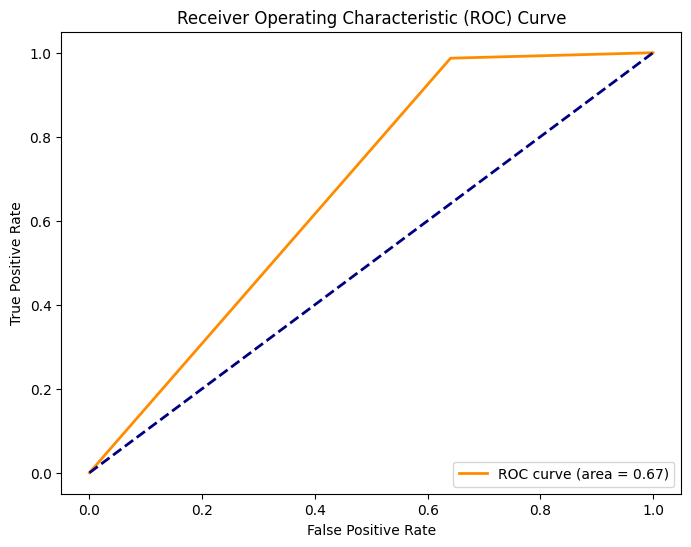

In [216]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming 'recipes' is your DataFrame
fpr, tpr, thresholds = roc_curve(recipes['viande'], recipes['viande_pred'])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
